In [1]:
import pandas as pd
import matplotlib as plt
import xlrd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn import preprocessing

C:\Users\benja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Country_ranking = pd.read_csv('Country Complexity Rankings 1995 - 2018.csv')

In [3]:
Country_ranking.head()

,Country,ECI Rank 2018,ECI Rank 2017,ECI Rank 2016,ECI Rank 2015,ECI Rank 2014,ECI Rank 2013,ECI Rank 2012,ECI Rank 2011,ECI Rank 2010,...,COI Rank 2004,COI Rank 2003,COI Rank 2002,COI Rank 2001,COI Rank 2000,COI Rank 1999,COI Rank 1998,COI Rank 1997,COI Rank 1996,COI Rank 1995
0,Angola,131,130,123,123,129,124,128,128,129,...,120,125,127,127,124,121,122,123,124,125
1,Albania,76,77,86,86,82,83,80,77,83,...,62,62,62,61,56,69,68,67,59,72
2,United Arab Emirates,62,49,59,64,68,80,50,68,65,...,83,88,88,88,89,82,79,97,94,88
3,Argentina,73,71,75,65,64,59,65,63,60,...,28,40,38,30,30,33,35,32,38,30
4,Armenia,79,83,73,68,70,71,45,47,64,...,70,75,68,64,68,68,71,56,54,103


## 1. Data Cleaning

In [4]:
Country_ranking = Country_ranking.melt(id_vars=['Country'])

In [5]:
Country_ranking['Mode'] = Country_ranking['variable'].str.split(' ', 1).str[0]
Country_ranking['Rank'] = Country_ranking['variable'].str.split(' ', 0).str[1]
Country_ranking['Year'] = Country_ranking['variable'].str.split(' ', 2).str[2]
Country_ranking

,Country,variable,value,Mode,Rank,Year
0,Angola,ECI Rank 2018,131.0,ECI,Rank,2018
1,Albania,ECI Rank 2018,76.0,ECI,Rank,2018
2,United Arab Emirates,ECI Rank 2018,62.0,ECI,Rank,2018
3,Argentina,ECI Rank 2018,73.0,ECI,Rank,2018
4,Armenia,ECI Rank 2018,79.0,ECI,Rank,2018
...,...,...,...,...,...,...
12763,Vietnam,COI Rank 1995,69.0,COI,Rank,1995
12764,Yemen,COI Rank 1995,126.0,COI,Rank,1995
12765,South Africa,COI Rank 1995,21.0,COI,Rank,1995
12766,Zambia,COI Rank 1995,90.0,COI,Rank,1995


In [6]:
Country_ranking.Year.fillna(Country_ranking.Rank, inplace=True)

In [7]:
Country_ranking['Rank'].replace(
    to_replace=['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995'],
    value='Value',
    inplace=True
)

In [8]:
Country_ranking['Category']=Country_ranking['Mode'].astype(str) + ('_') + Country_ranking['Rank']
Country_ranking['CountryYear']=Country_ranking['Country'].astype(str) + (' ') + Country_ranking['Year']

In [9]:
Country_ranking.head()

,Country,variable,value,Mode,Rank,Year,Category,CountryYear
0,Angola,ECI Rank 2018,131.0,ECI,Rank,2018,ECI_Rank,Angola 2018
1,Albania,ECI Rank 2018,76.0,ECI,Rank,2018,ECI_Rank,Albania 2018
2,United Arab Emirates,ECI Rank 2018,62.0,ECI,Rank,2018,ECI_Rank,United Arab Emirates 2018
3,Argentina,ECI Rank 2018,73.0,ECI,Rank,2018,ECI_Rank,Argentina 2018
4,Armenia,ECI Rank 2018,79.0,ECI,Rank,2018,ECI_Rank,Armenia 2018


In [10]:
Country_ranking.drop(['Mode', 'Rank'], axis=1, inplace=True)
Country_ranking.head()

,Country,variable,value,Year,Category,CountryYear
0,Angola,ECI Rank 2018,131.0,2018,ECI_Rank,Angola 2018
1,Albania,ECI Rank 2018,76.0,2018,ECI_Rank,Albania 2018
2,United Arab Emirates,ECI Rank 2018,62.0,2018,ECI_Rank,United Arab Emirates 2018
3,Argentina,ECI Rank 2018,73.0,2018,ECI_Rank,Argentina 2018
4,Armenia,ECI Rank 2018,79.0,2018,ECI_Rank,Armenia 2018


In [11]:
Country_ranking_pivot=Country_ranking.pivot_table(values='value', index=['Country', 'Year'], columns='Category', aggfunc='first')

In [12]:
Country_ranking_pivot

Category       COI_Rank  COI_Value  ECI_Rank  ECI_Value
Country  Year                                          
Albania  1995      72.0    -0.3739      84.0    -0.4866
         1996      59.0     0.0747      81.0    -0.4190
         1997      67.0    -0.0955      79.0    -0.3644
         1998      68.0    -0.1640      75.0    -0.3206
         1999      69.0    -0.1727      77.0    -0.3395
...                 ...        ...       ...        ...
Zimbabwe 2014      98.0    -0.8727     100.0    -0.7339
         2015     105.0    -0.9800     107.0    -0.8368
         2016     108.0    -1.0069     108.0    -0.9568
         2017     107.0    -1.0391     107.0    -0.9524
         2018      96.0    -0.8285     109.0    -0.9291

[3192 rows x 4 columns]

In [13]:
Country_ranking_pivot.reset_index(inplace=True)

In [14]:
Country_ranking_pivot.head()

Category,Country,Year,COI_Rank,COI_Value,ECI_Rank,ECI_Value
0,Albania,1995,72.0,-0.3739,84.0,-0.4866
1,Albania,1996,59.0,0.0747,81.0,-0.4190
2,Albania,1997,67.0,-0.0955,79.0,-0.3644
3,Albania,1998,68.0,-0.1640,75.0,-0.3206
4,Albania,1999,69.0,-0.1727,77.0,-0.3395


In [15]:
#United, el, new

In [16]:
Country_ranking_pivot['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia',
       'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali',
       'Mauritania', 'Mauritius', 'Mexic

In [17]:
Country_ranking_pivot['Year'].unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype=object)

## 2. EDA

In [18]:
Country_ranking_pivot

Category,Country,Year,COI_Rank,COI_Value,ECI_Rank,ECI_Value
0,Albania,1995,72.0,-0.3739,84.0,-0.4866
1,Albania,1996,59.0,0.0747,81.0,-0.4190
2,Albania,1997,67.0,-0.0955,79.0,-0.3644
3,Albania,1998,68.0,-0.1640,75.0,-0.3206
4,Albania,1999,69.0,-0.1727,77.0,-0.3395
...,...,...,...,...,...,...
3187,Zimbabwe,2014,98.0,-0.8727,100.0,-0.7339
3188,Zimbabwe,2015,105.0,-0.9800,107.0,-0.8368
3189,Zimbabwe,2016,108.0,-1.0069,108.0,-0.9568
3190,Zimbabwe,2017,107.0,-1.0391,107.0,-0.9524


In [19]:
ranking_2018 = Country_ranking_pivot[Country_ranking_pivot['Year']== '2018' ]
ranking_1995 = Country_ranking_pivot[Country_ranking_pivot['Year']== '1995' ]

In [20]:
X = Country_ranking_pivot['COI_Value']
y = Country_ranking_pivot['ECI_Value']
X = np.array(X).reshape((len(X), 1))
y = np.array(y).reshape((len(y), 1))

Text(0, 0.5, 'ECI Value')

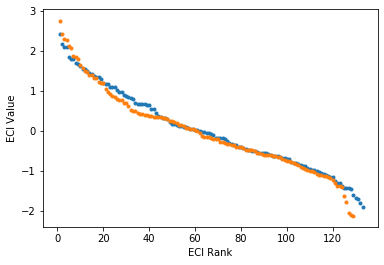

In [21]:
plt.scatter(ranking_2018['ECI_Rank'], ranking_2018['ECI_Value'], marker='.')
plt.scatter(ranking_1995['ECI_Rank'], ranking_1995['ECI_Value'], marker='.')
plt.xlabel("ECI Rank")
plt.ylabel("ECI Value")

In [22]:
# first one => steep effort to get there

Text(0, 0.5, 'ECI Rank')

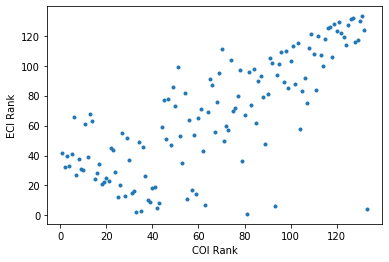

In [23]:
plt.scatter(ranking_2018['COI_Rank'], ranking_2018['ECI_Rank'], marker='.')
plt.xlabel("COI Rank")
plt.ylabel("ECI Rank")

In [24]:
# the most complex are not the most diversified, curv in Nike
# true for the head of the group, then correlation between complexity and diversity

Text(0, 0.5, 'ECI Value')

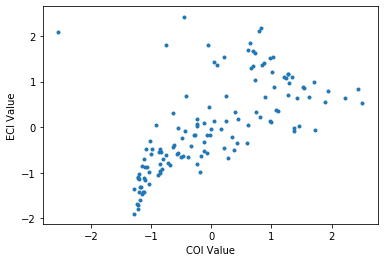

In [25]:
plt.scatter(ranking_2018['COI_Value'], ranking_2018['ECI_Value'], marker='.')
plt.xlabel("COI Value")
plt.ylabel("ECI Value")

In [26]:
#see the kmean clustering
#correlation between complexity and diversity

Text(0, 0.5, 'ECI Rank 2018')

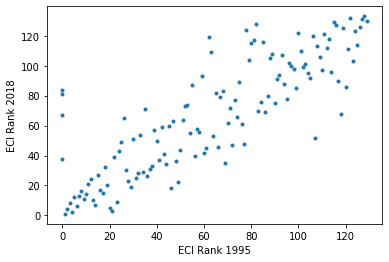

In [27]:
plt.scatter(ranking_1995['ECI_Rank'], ranking_2018['ECI_Rank'], marker='.')
plt.xlabel("ECI Rank 1995")
plt.ylabel("ECI Rank 2018")

In [28]:
#heads have fallen behind, ranking is ather consistent

Text(0, 0.5, 'COI Rank 2018')

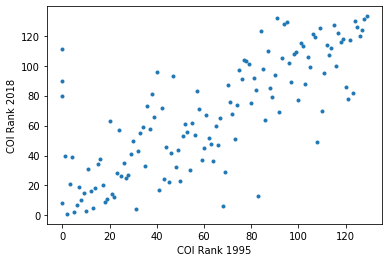

In [29]:
plt.scatter(ranking_1995['COI_Rank'], ranking_2018['COI_Rank'], marker='.')
plt.xlabel("COI Rank 1995")
plt.ylabel("COI Rank 2018")

Text(0, 0.5, 'ECI Value 2018')

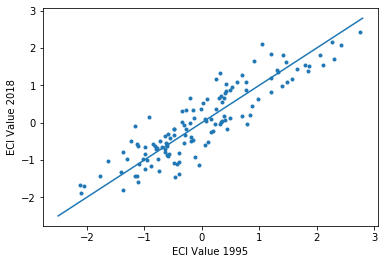

In [30]:
plt.scatter(ranking_1995['ECI_Value'], ranking_2018['ECI_Value'], marker='.')
i = [-2.5, 2.8]
plt.plot(i,i)
plt.xlabel("ECI Value 1995")
plt.ylabel("ECI Value 2018")

In [31]:
#not a general improvment

Text(0, 0.5, 'COI Value 2018')

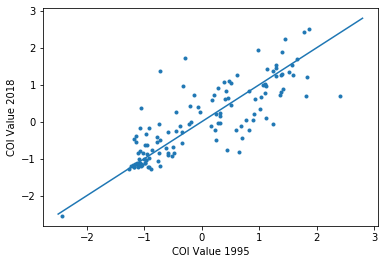

In [32]:
plt.scatter(ranking_1995['COI_Value'], ranking_2018['COI_Value'], marker='.')
plt.plot(i,i)
plt.xlabel("COI Value 1995")
plt.ylabel("COI Value 2018")

In [33]:
#idem

In [34]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 25)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
y_kmeans = k_means.predict(X)
plt.scatter(X[:, 0], y[:, 0], c=y_kmeans, s=1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [35]:
Country_ranking_pivot.dropna(inplace=True)

In [36]:
Ranked_table1= Country_ranking_pivot[Country_ranking_pivot['Year']== '2018' ].sort_values(by=['ECI_Rank'],ascending=True)
Ranked_table1.head(10)

Category,Country,Year,COI_Rank,COI_Value,ECI_Rank,ECI_Value
1391,Japan,2018,81.0,-0.4496,1.0,2.4265
2711,Switzerland,2018,33.0,0.8338,2.0,2.1664
2615,South Korea,2018,35.0,0.7854,3.0,2.1058
1055,Germany,2018,133.0,-2.5429,4.0,2.0865
2519,Singapore,2018,42.0,0.6391,5.0,1.8512
167,Austria,2018,93.0,-0.7572,6.0,1.8062
695,Czechia,2018,63.0,-0.0561,7.0,1.8032
2687,Sweden,2018,43.0,0.6159,8.0,1.6976
1199,Hungary,2018,39.0,0.6909,9.0,1.6623
2567,Slovenia,2018,38.0,0.7256,10.0,1.6167


In [37]:
Ranked_table2= Country_ranking_pivot[Country_ranking_pivot['Year']== '1995' ].sort_values(by=['ECI_Rank'],ascending=True)
Ranked_table2.head(10)

Category,Country,Year,COI_Rank,COI_Value,ECI_Rank,ECI_Value
1368,Japan,1995,38.0,0.6964,1.0,2.7586
1032,Germany,1995,129.0,-2.4293,2.0,2.4217
2664,Sweden,1995,32.0,0.9213,3.0,2.2965
2688,Switzerland,1995,35.0,0.8285,4.0,2.2759
936,Finland,1995,27.0,1.0998,5.0,2.1119
144,Austria,1995,47.0,0.4470,6.0,2.0672
2976,United Kingdom,1995,23.0,1.1175,7.0,1.8763
960,France,1995,48.0,0.4294,8.0,1.8500
3000,United States of America,1995,33.0,0.9107,9.0,1.7995
1320,Italy,1995,34.0,0.8987,10.0,1.6530


In [38]:
Ranked_table3= Country_ranking_pivot[Country_ranking_pivot['Year']== '2018' ].sort_values(by=['COI_Rank'],ascending=True)
Ranked_table3.head(10)

Category,Country,Year,COI_Rank,COI_Value,ECI_Rank,ECI_Value
1223,India,2018,1.0,2.5097,42.0,0.5385
2639,Spain,2018,2.0,2.4374,32.0,0.8289
2879,Turkey,2018,3.0,2.2273,40.0,0.6397
2327,Portugal,2018,4.0,1.9357,33.0,0.8011
407,Bulgaria,2018,5.0,1.8861,41.0,0.5545
839,Egypt,2018,6.0,1.7173,66.0,-0.0611
1991,Netherlands,2018,7.0,1.6997,27.0,0.9801
2495,Serbia,2018,8.0,1.6173,38.0,0.6668
1655,Lithuania,2018,9.0,1.5413,31.0,0.8571
623,Croatia,2018,10.0,1.5308,30.0,0.8702


In [39]:
Ranked_table4= Country_ranking_pivot[Country_ranking_pivot['Year']== '1995' ].sort_values(by=['COI_Rank'],ascending=True)
Ranked_table4.head(10)

Category,Country,Year,COI_Rank,COI_Value,ECI_Rank,ECI_Value
528,China,1995,1.0,2.4049,46.0,0.3210
1200,India,1995,2.0,1.8646,60.0,0.0195
2280,Poland,1995,3.0,1.8366,28.0,0.7751
1176,Hungary,1995,4.0,1.8197,23.0,0.9183
2616,Spain,1995,5.0,1.7853,18.0,1.2115
1968,Netherlands,1995,6.0,1.6527,15.0,1.4019
2760,Thailand,1995,7.0,1.5962,49.0,0.2534
600,Croatia,1995,8.0,1.5706,27.0,0.7793
744,Denmark,1995,9.0,1.5180,12.0,1.4865
2856,Turkey,1995,10.0,1.4457,56.0,0.0857


In [40]:
Ranked_table5 = Country_ranking_pivot[Country_ranking_pivot['Country']== 'China' ].sort_values(by=['Year'],ascending=True)
Ranked_table5

Category,Country,Year,COI_Rank,COI_Value,ECI_Rank,ECI_Value
528,China,1995,1.0,2.4049,46.0,0.3210
529,China,1996,1.0,2.1973,41.0,0.3859
530,China,1997,1.0,2.4619,41.0,0.3926
531,China,1998,1.0,2.4013,44.0,0.3410
532,China,1999,1.0,2.3252,42.0,0.3887
533,China,2000,1.0,2.4172,39.0,0.4387
534,China,2001,2.0,2.2951,35.0,0.5372
535,China,2002,3.0,1.9645,31.0,0.6171
536,China,2003,4.0,2.0008,31.0,0.6489
537,China,2004,2.0,2.0160,30.0,0.7029


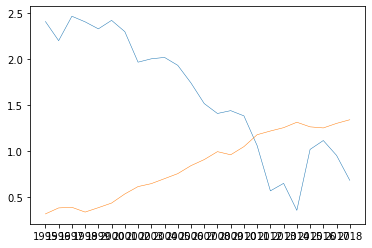

In [41]:
figure, ax1 = plt.subplots()
ax1.plot(Ranked_table5[Ranked_table5.columns[1]],
         Ranked_table5[Ranked_table5.columns[3]],linewidth=0.5,zorder=1, label = "Force1")
ax1.plot(Ranked_table5[Ranked_table5.columns[1]],
         Ranked_table5[Ranked_table5.columns[5]],linewidth=0.5,zorder=1, label = "Force1")

In [42]:
G= 'Singapore'

Text(0, 0.5, 'ECI & COI Value')

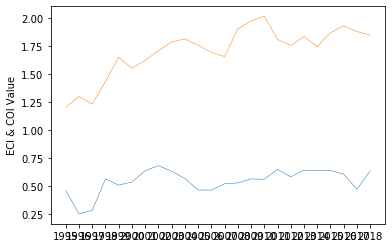

In [43]:
Ranked_table7 = Country_ranking_pivot[Country_ranking_pivot['Country']== G ].sort_values(by=['Year'],ascending=True)
Ranked_table7.head(25)
figure, ax1 = plt.subplots()
ax1.plot(Ranked_table7[Ranked_table7.columns[1]],Ranked_table7[Ranked_table7.columns[3]],linewidth=0.5,zorder=1, label = "Force1")
ax1.plot(Ranked_table7[Ranked_table7.columns[1]],Ranked_table7[Ranked_table7.columns[5]],linewidth=0.5,zorder=1, label = "Force1")
plt.ylabel("ECI & COI Value")

Complexity: ECI    
    A measure of the knowledge in a society as expressed in the products it makes. The economic complexity of a country is calculated based on the diversity of exports a country produces and their ubiquity, or the number of the countries able to produce them (and those countries’ complexity).

   Countries that are able to sustain a diverse range of productive know-how, including sophisticated, unique know-how, are found to be able to produce a wide diversity of goods, including complex products that few other countries can make.

Economic Complexity Outlook: COI   
A measure of how many complex products are near a country’s current set of productive capabilities. The COI captures the ease of diversification for a country, where a high COI reflects an abundance of nearby complex products that rely on similar capabilities or know-how as that present in current production. Complexity outlook captures the connectedness of an economy’s existing capabilities to drive easy (or hard) diversification into related complex production, using the Product Space.

In [44]:
Country_gdp = pd.read_csv('GDP Data World.csv')
Country_gdp.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,2.145067e+09,2.170503e+09,2.323456e+09,2.369738e+09,2.399077e+09,2.581805e+09,2.505093e+09,2.423085e+09,2.470954e+09,...,2.481964e+09,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.465115e+09,8.124454e+09,...,1.386519e+10,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10
2,Angola,2.680850e+10,3.043954e+10,3.265379e+10,3.418563e+10,3.493139e+10,3.599841e+10,3.751250e+10,4.263884e+10,4.391368e+10,...,7.991621e+10,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10
3,Albania,5.429695e+09,5.923797e+09,5.276919e+09,5.742876e+09,6.483126e+09,6.933706e+09,7.508515e+09,7.849399e+09,8.283475e+09,...,1.150061e+10,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10
4,Andorra,2.080046e+09,2.176762e+09,2.374144e+09,2.449993e+09,2.550420e+09,2.640408e+09,2.854793e+09,2.984582e+09,3.244067e+09,...,3.519475e+09,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09


In [45]:
Country_gdp.rename(columns={'Country Name': "Country"},inplace=True)
Country_gdp.head()

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,2.145067e+09,2.170503e+09,2.323456e+09,2.369738e+09,2.399077e+09,2.581805e+09,2.505093e+09,2.423085e+09,2.470954e+09,...,2.481964e+09,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.465115e+09,8.124454e+09,...,1.386519e+10,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10
2,Angola,2.680850e+10,3.043954e+10,3.265379e+10,3.418563e+10,3.493139e+10,3.599841e+10,3.751250e+10,4.263884e+10,4.391368e+10,...,7.991621e+10,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10
3,Albania,5.429695e+09,5.923797e+09,5.276919e+09,5.742876e+09,6.483126e+09,6.933706e+09,7.508515e+09,7.849399e+09,8.283475e+09,...,1.150061e+10,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10
4,Andorra,2.080046e+09,2.176762e+09,2.374144e+09,2.449993e+09,2.550420e+09,2.640408e+09,2.854793e+09,2.984582e+09,3.244067e+09,...,3.519475e+09,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09


In [46]:
Country_gdp_melt= Country_gdp.melt(id_vars=['Country'])
Country_gdp_melt.rename(columns={'variable': "Year", 'value': "Constant GDP"},inplace=True)

Country_gdp_melt.head()

,Country,Year,Constant GDP
0,Aruba,1995,2.145067e+09
1,Afghanistan,1995,NaN
2,Angola,1995,2.680850e+10
3,Albania,1995,5.429695e+09
4,Andorra,1995,2.080046e+09


In [47]:
global_table = pd.merge(Country_gdp_melt, Country_ranking_pivot, on=['Country', 'Year'])
global_table.head(5)

,Country,Year,Constant GDP,COI_Rank,COI_Value,ECI_Rank,ECI_Value
0,Angola,1995,2.680850e+10,125.0,-1.1869,127.0,-2.0446
1,Albania,1995,5.429695e+09,72.0,-0.3739,84.0,-0.4866
2,United Arab Emirates,1995,1.513817e+11,88.0,-0.7751,70.0,-0.2093
3,Argentina,1995,2.670112e+11,30.0,1.0168,52.0,0.1986
4,Armenia,1995,3.354354e+09,103.0,-0.9955,67.0,-0.1822


In [48]:
global_table['Constant GDP'] =global_table['Constant GDP']/ global_table['Constant GDP'].max()

In [49]:
global_table.sort_values(['Constant GDP'], ascending=True).tail(20)

,Country,Year,Constant GDP,COI_Rank,COI_Value,ECI_Rank,ECI_Value
2138,China,2013,0.712908,40.0,0.6520,18.0,1.2551
2257,China,2014,0.765839,55.0,0.3599,18.0,1.3139
2376,China,2015,0.819768,25.0,1.0196,18.0,1.2640
2495,China,2016,0.875911,22.0,1.1159,19.0,1.2522
2614,China,2017,0.936754,28.0,0.9549,19.0,1.3014
2733,China,2018,1.000000,40.0,0.6848,18.0,1.3409
59,Liberia,1995,NaN,114.0,-1.0989,106.0,-0.8910
60,Libya,1995,NaN,107.0,-1.0553,82.0,-0.4667
91,Qatar,1995,NaN,113.0,-1.0902,90.0,-0.5944
174,Liberia,1996,NaN,120.0,-1.1710,120.0,-1.2236


In [50]:
global_table.dropna(inplace=True)

In [51]:
G='India'

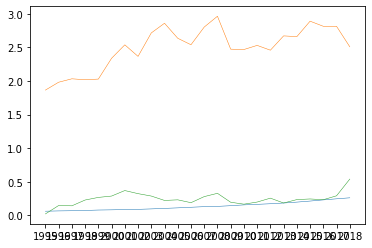

In [52]:
global_table1 = global_table[global_table['Country']== G ].sort_values(by=['Year'],ascending=True)
figure, ax1 = plt.subplots()
ax1.plot(global_table1[global_table1.columns[1]],
         global_table1[global_table1.columns[2]],linewidth=0.5,zorder=1, label = "1")
ax1.plot(global_table1[global_table1.columns[1]],
         global_table1[global_table1.columns[4]],linewidth=0.5,zorder=1, label = "2")
ax1.plot(global_table1[global_table1.columns[1]],
         global_table1[global_table1.columns[6]],linewidth=0.5,zorder=1, label = "3")

In [87]:
Ranked_tableA= global_table[global_table['Year']== '2018' ].sort_values(by=['Constant_GDP'],ascending=False)
Ranked_tableA.head(20)

,Country,Year,Constant_GDP,COI_Rank,COI_Value,ECI_Rank,ECI_Value
2733,China,2018,1.000000,40.0,0.6848,18.0,1.3409
2766,Japan,2018,0.567493,81.0,-0.4496,1.0,2.4265
2739,Germany,2018,0.362112,133.0,-2.5429,4.0,2.0865
2748,France,2018,0.269269,32.0,0.8372,16.0,1.3726
2750,United Kingdom,2018,0.264815,28.0,0.9781,13.0,1.5073
2760,India,2018,0.259558,1.0,2.5097,42.0,0.5385
2728,Brazil,2018,0.213452,34.0,0.8091,49.0,0.2137
2763,Italy,2018,0.196908,59.0,0.0399,14.0,1.4400
2730,Canada,2018,0.175443,12.0,1.4174,39.0,0.6462
2744,Spain,2018,0.141592,2.0,2.4374,32.0,0.8289


correct the chinese gdp figures with regression from gdp, ECI, COI
which model of industry? cluster

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [54]:
df =global_table

In [55]:
df.rename(columns={"Constant GDP": "Constant_GDP"}, inplace=True)

In [56]:
cdf1 = df[['COI_Value','ECI_Value','Constant_GDP']]
cdf1.shape

(2817, 3)

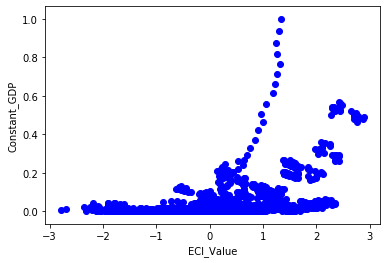

In [57]:
plt.scatter(cdf1.ECI_Value, cdf1.Constant_GDP,  color='blue')
plt.xlabel("ECI_Value")
plt.ylabel("Constant_GDP")
plt.show()

In [58]:
Comp_1995 = global_table[global_table['Year']== '1995' ]
Comp_1995.rename(columns={"Constant GDP": "Constant_GDP"}, inplace=True)
Comp_2018 = global_table[global_table['Year']== '2018' ]
Comp_2018.rename(columns={"Constant GDP": "Constant_GDP"}, inplace=True)
cdf2 = Comp_1995[['COI_Value','ECI_Value','Constant_GDP']]
cdf3 = Comp_2018[['COI_Value','ECI_Value','Constant_GDP']]


C:\Users\benja\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


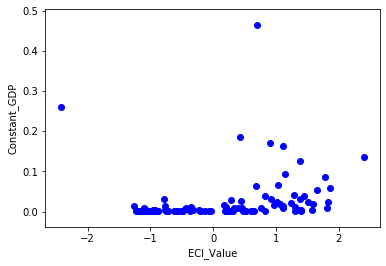

In [59]:
plt.scatter(cdf2.COI_Value, cdf2.Constant_GDP,  color='blue')
plt.xlabel("ECI_Value")
plt.ylabel("Constant_GDP")
plt.show()

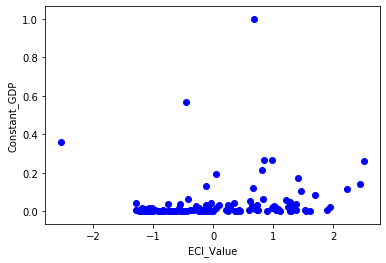

In [60]:
plt.scatter(cdf3.COI_Value, cdf3.Constant_GDP,  color='blue')
plt.xlabel("ECI_Value")
plt.ylabel("Constant_GDP")
plt.show()

In [61]:
cdf4 = df[['COI_Value','ECI_Value','Constant_GDP']]

In [80]:
msk = np.random.rand(len(df)) < 0.8
train = cdf4[msk]
test = cdf4[~msk]

In [81]:
#Multiple Linear Reg
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['COI_Value','ECI_Value']])
y = np.asanyarray(train[['Constant_GDP']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
#Prediction
y_hat= regr.predict(test[['COI_Value','ECI_Value']])
x = np.asanyarray(test[['COI_Value','ECI_Value']])
y = np.asanyarray(test[['Constant_GDP']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.01750465  0.05144844]]
Residual sum of squares: 0.00
Variance score: 0.20


In [82]:
df5=global_table[global_table.Country != 'China']
cdf5 = df5[['COI_Value','ECI_Value','Constant_GDP']]
msk = np.random.rand(len(df5)) < 0.8
train = cdf5[msk]
test = cdf5[~msk]

In [83]:
#Multiple Linear Reg
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['COI_Value','ECI_Value']])
y = np.asanyarray(train[['Constant_GDP']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
#Prediction
y_hat= regr.predict(test[['COI_Value','ECI_Value']])
x = np.asanyarray(test[['COI_Value','ECI_Value']])
y = np.asanyarray(test[['Constant_GDP']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.01806604  0.04796126]]
Residual sum of squares: 0.00
Variance score: 0.31


=> gdp per capita